## Shipt – Interview Challenge – Data Analyst

### Required Questions

In [321]:
# Importing the libraries
import pandas as pd
import numpy as np

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [322]:
# Reading the InterviewData_Cost.csv file
InterviewData_Cost = pd.read_csv('/Users/abhilashasinha/Downloads/interview_challenge_data_analyst/InterviewData_Cost.csv')

In [323]:
# Data in InterviewData_Cost
InterviewData_Cost

,date,source_id,cost
0,10/17/14,PA0577,7168.0
1,8/17/14,PA0354,7615.0
2,1/7/14,PA0607,4054.0
3,8/25/14,PA0745,9317.0
4,11/30/14,PA0923,5586.0
...,...,...,...
9995,1/10/14,PA0830,6202.0
9996,1/31/14,PA0467,7057.0
9997,10/14/14,PA0277,9112.0
9998,10/1/14,PA0293,1053.0


In [324]:
# Reading the InterviewData_Rev.csv file
InterviewData_Rev = pd.read_csv('/Users/abhilashasinha/Downloads/interview_challenge_data_analyst/InterviewData_Rev.csv')

In [325]:
# Data in InterviewData_Rev 
InterviewData_Rev

,date,source_id,revenue
0,8/1/14,PA0368,5717.0
1,1/31/14,PA0277,1380.0
2,6/9/14,PA0745,7535.0
3,9/1/14,PA0751,2868.0
4,3/12/14,PA0859,10757.0
...,...,...,...
9995,9/24/14,PA0174,3827.0
9996,10/26/14,PA0318,533.0
9997,8/3/14,PA0923,4963.0
9998,1/4/14,PA0354,3070.0


### Q1. Join these two data sets by “date” and “source_id”, returning all rows from both regardless of whether there is a match between the two data sets

<b> Ans: Since we need all rows from both InterviewData_Cost and InterviewData_Rev regardless of whether there is a match between the two data sets, I have joined them using outer join on 'data' and 'source_id'. </b>

In [326]:
# Join the two tables using outer join
data_all = pd.merge(InterviewData_Cost,InterviewData_Rev,on=['date','source_id'],how='outer')
data_all

,date,source_id,cost,revenue
0,10/17/14,PA0577,7168.0,8417.0
1,8/17/14,PA0354,7615.0,4200.0
2,1/7/14,PA0607,4054.0,7935.0
3,8/25/14,PA0745,9317.0,5536.0
4,11/30/14,PA0923,5586.0,NaN
...,...,...,...,...
14613,12/29/14,PA0958,NaN,7406.0
14614,3/19/14,PA0732,NaN,6584.0
14615,9/24/14,PA0174,NaN,3827.0
14616,10/26/14,PA0318,NaN,533.0


In [327]:
data_all['source_id'].unique()

array(['PA0577', 'PA0354', 'PA0607', 'PA0745', 'PA0923', 'PA0808',
       'PA0952', 'PA0411', 'PA0526', 'PA0168', 'PA0277', 'PA0057',
       'PA0482', 'PA0368', 'PA0552', 'PA0696', 'PA0258', 'PA0338',
       'PA0619', 'PA0270', 'PA0474', 'PA0958', 'PA0308', 'PA0830',
       'PA0752', 'PA0859', 'PA0174', 'PA0792', 'PA0732', 'PA0318',
       'PA0293', 'PA0198', 'PA0202', 'PA0843', 'PA0873', 'PA0973',
       'PA0394', 'PA0751', 'PA0169', 'PA0352', 'PA0126', 'PA0672',
       'PA0900', 'PA0527', 'PA0534', 'PA0470', 'PA0543', 'PA0467',
       'PA0678', 'PA0659'], dtype=object)

### Q2. Join these two data sets by “date” and “source_id”, returning only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.

<b> Ans: Here, I have used left join to join the two data sets. As we need all the rows from InterviewData_Cost, it is placed on the left side of the query. </b>

In [328]:
# Join the two tables using left join
pd.merge(InterviewData_Cost,InterviewData_Rev,on=['date','source_id'],how='left')

,date,source_id,cost,revenue
0,10/17/14,PA0577,7168.0,8417.0
1,8/17/14,PA0354,7615.0,4200.0
2,1/7/14,PA0607,4054.0,7935.0
3,8/25/14,PA0745,9317.0,5536.0
4,11/30/14,PA0923,5586.0,NaN
...,...,...,...,...
9995,1/10/14,PA0830,6202.0,NaN
9996,1/31/14,PA0467,7057.0,NaN
9997,10/14/14,PA0277,9112.0,8853.0
9998,10/1/14,PA0293,1053.0,NaN


### Q3. Using your result from #1:

### a. What are the Top 4 sources (“source_id” values) in terms of total revenue generation across this data set?

### b. How would you visualize the monthly revenue for those Top 4 sources?

### a. What are the Top 4 sources (“source_id” values) in terms of total revenue generation across this data set?

In [329]:
# data_all_total contains the aggregate of revenue for each source_id 
data_all_total = data_all.groupby(data_all['source_id']).agg({'revenue':'sum'}).reset_index()
data_all_total

,source_id,revenue
0,PA0057,1032845.0
1,PA0126,1245754.0
2,PA0168,1132637.0
3,PA0169,1223275.0
4,PA0174,1203643.0
5,PA0198,1152959.0
6,PA0202,1246337.0
7,PA0258,1185512.0
8,PA0270,1237148.0
9,PA0277,1201316.0


In [330]:
#Sorting the data obtained from previous query in descending order of total revenue
data_all_total.sort_values(by=['revenue'], inplace=True, ascending=False)
data_all_total

,source_id,revenue
24,PA0527,1385747.0
11,PA0308,1338615.0
14,PA0352,1309685.0
27,PA0552,1283190.0
34,PA0696,1279198.0
48,PA0958,1271398.0
26,PA0543,1266861.0
23,PA0526,1257963.0
25,PA0534,1254734.0
6,PA0202,1246337.0


In [331]:
#Top 4 source_ids with highest revenue
data_all_total_top4 = data_all_total.head(4)
data_all_total_top4

,source_id,revenue
24,PA0527,1385747.0
11,PA0308,1338615.0
14,PA0352,1309685.0
27,PA0552,1283190.0


In [332]:
# Creating a list with only the top 4 source_ids
data_source_id4 = data_all_total_top4['source_id'].tolist()

Top 4 sources (“source_id” values) in terms of total revenue generation across this data set

In [333]:
# Data in the list data_source_id4 showing top 4 “source_id” values in terms of total revenue generation across data set
data_source_id4

['PA0527', 'PA0308', 'PA0352', 'PA0552']

### b. How would you visualize the monthly revenue for those Top 4 sources?

In order to visualize the monthly revenue, I have created a dataframe having the top 4 source_ids and the aggregated revenue generated in each month. 

In [341]:
# Selecting records which belongs to the top 4 source_ids having highest revenue
data_all_filtered = data_all[data_all['source_id'].isin(data_source_id4)]

In [342]:
data_all_filtered

,date,source_id,cost,revenue
16,3/29/14,PA0552,7894.0,NaN
22,8/21/14,PA0552,4653.0,NaN
27,4/28/14,PA0308,3958.0,10863.0
65,12/20/14,PA0552,2092.0,NaN
76,8/13/14,PA0308,777.0,3863.0
...,...,...,...,...
14543,7/26/14,PA0308,NaN,1262.0
14545,7/2/14,PA0308,NaN,3582.0
14558,10/14/14,PA0308,NaN,10001.0
14580,7/5/14,PA0308,NaN,11646.0


In [343]:
# Unique source_ids
data_all_filtered.source_id.unique()

array(['PA0552', 'PA0308', 'PA0352', 'PA0527'], dtype=object)

In [344]:
# Checking the data types
data_all_filtered.dtypes

date          object
source_id     object
cost         float64
revenue      float64
dtype: object

In [345]:
# Converting date from object to date format 
data_all_filtered['date'] = pd.to_datetime(data_all_filtered['date'], format = '%m/%d/%y')

According to the question, we need the monthly revenue, so I have selected the sum of revenue for each source_id in each month in year 2014.

In [346]:
# data_all_date contains the monthly aggregate of revenue for each source_id 
data_all_date = data_all_filtered.groupby([data_all_filtered['date'].dt.month,data_all_filtered['source_id']]).agg({'revenue':'sum'})

In [347]:
data_all_date

revenue
date source_id          
1    PA0308      74573.0
     PA0352     103252.0
     PA0527     111528.0
     PA0552      95687.0
2    PA0308     108134.0
     PA0352      83001.0
     PA0527     105195.0
     PA0552      99742.0
3    PA0308     142817.0
     PA0352     100480.0
     PA0527     135439.0
     PA0552      90240.0
4    PA0308     164805.0
     PA0352      93279.0
     PA0527     112385.0
     PA0552     111432.0
5    PA0308     122349.0
     PA0352     148362.0
     PA0527     114339.0
     PA0552     129668.0
6    PA0308      76398.0
     PA0352     139655.0
     PA0527     112022.0
     PA0552     103569.0
7    PA0308     104544.0
     PA0352     118855.0
     PA0527     128733.0
     PA0552     117613.0
8    PA0308      99909.0
     PA0352     115949.0
     PA0527      91288.0
     PA0552      78776.0
9    PA0308      99915.0
     PA0352     117853.0
     PA0527     140484.0
     PA0552     118337.0
10   PA0308     113668.0
     PA0352     100393.0
     PA0527     135752.0
     PA0552     102767.0
11   PA0308     107097.0
     PA0352      78840.0
     PA0527      66297.0
     PA0552      94062.0
12   PA0308     124406.0
     PA0352     109766.0
     PA0527     132285.0
     PA0552     141297.0

Visualizing the monthly revenue for those Top 4 sources

In [348]:
data_all_vis = data_all_date.reset_index()

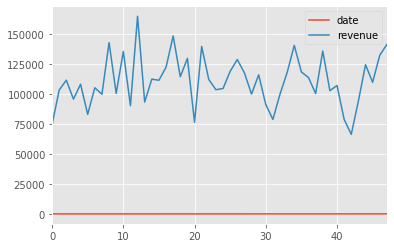

In [349]:
# Plot to visualize the data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

data_all_vis.plot()

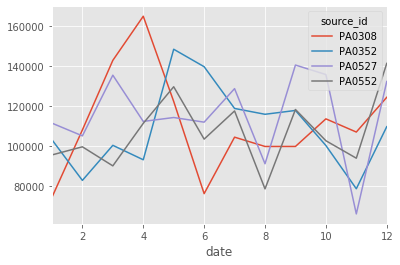

In [350]:
# Monthly revenue for Top 4 sources plotted together
pv = pd.pivot_table(data_all_vis, index=data_all_vis.date, columns=data_all_vis.source_id,
                    values='revenue')
pv.plot()

source_id
PA0308    AxesSubplot(0.125,0.125;0.775x0.755)
PA0352    AxesSubplot(0.125,0.125;0.775x0.755)
PA0527    AxesSubplot(0.125,0.125;0.775x0.755)
PA0552    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

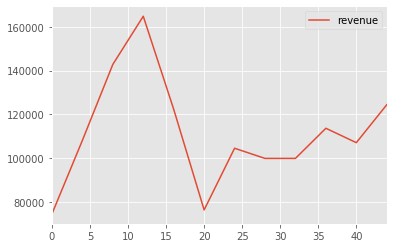

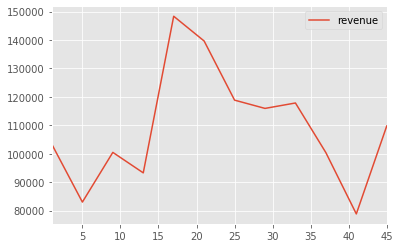

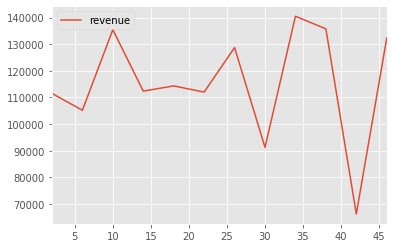

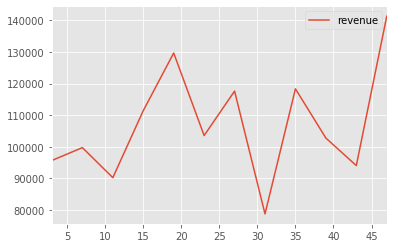

In [351]:
# Single plot for each source_id to understand the revenue pattern of each source
data_all_vis.groupby('source_id').plot(y='revenue')

### Questions 4 and 5 deal with “InterviewData_Activity.csv”.

### 4.Assuming you’ve read the data into an R object called activity_data, run the following code to build a basic logistic regression model:

In [352]:
# Reading the InterviewData_Activity.csv file
activity_data = pd.read_csv('/Users/abhilashasinha/Downloads/interview_challenge_data_analyst/InterviewData_Activity.csv')

In [353]:
# Data in activity_data
activity_data

,userid,date,age,gender,metropolitan_area,device_type,active
0,4e3a9ea937b3a,8/4/15,30,F,Detroit,Tablet,1
1,4e3dd5154a08c,8/6/15,43,F,Charlotte,Desktop,1
2,4e3df1ecd131a,8/6/15,41,F,Tampa,Mobile,1
3,4e4e77461b1e3,8/19/15,56,F,Nashville,Desktop,1
4,4e4eb59b6de55,8/19/15,33,F,Detroit,Mobile,1
...,...,...,...,...,...,...,...
5415,4e9cce2b66d44,10/17/15,21,M,Houston,Tablet,0
5416,4f2ab00039f50,2/2/16,42,F,Birmingham,Mobile,0
5417,4e642e7208f6b,9/4/15,40,F,Houston,Mobile,0
5418,4f40149878765,2/18/16,40,F,Houston,Mobile,0


In [354]:
# Importing the library for statistical model
import statsmodels.api as sm

In [355]:
dummy_genders = pd.get_dummies(activity_data['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(activity_data['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(activity_data['device_type'], prefix = 'device')

In [356]:
activity_data

,userid,date,age,gender,metropolitan_area,device_type,active
0,4e3a9ea937b3a,8/4/15,30,F,Detroit,Tablet,1
1,4e3dd5154a08c,8/6/15,43,F,Charlotte,Desktop,1
2,4e3df1ecd131a,8/6/15,41,F,Tampa,Mobile,1
3,4e4e77461b1e3,8/19/15,56,F,Nashville,Desktop,1
4,4e4eb59b6de55,8/19/15,33,F,Detroit,Mobile,1
...,...,...,...,...,...,...,...
5415,4e9cce2b66d44,10/17/15,21,M,Houston,Tablet,0
5416,4f2ab00039f50,2/2/16,42,F,Birmingham,Mobile,0
5417,4e642e7208f6b,9/4/15,40,F,Houston,Mobile,0
5418,4f40149878765,2/18/16,40,F,Houston,Mobile,0


In [357]:
cols_to_keep = ['active', 'age']

In [358]:
activity_data = activity_data[cols_to_keep].join(dummy_genders.ix[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.ix[:, 'metro_area_Birmingham':])
activity_data = activity_data.join(dummy_device.ix[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)


In [359]:
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'],activity_data[explanatory_cols], family=sm.families.Binomial())

In [360]:
result = full_logit_model.fit()

In [361]:
activity_data

,active,age,gender_M,metro_area_Birmingham,metro_area_Charlotte,metro_area_Detroit,metro_area_Houston,metro_area_Mobile,metro_area_Nashville,metro_area_Tampa,device_Mobile,device_Tablet,const
0,1,30,0,0,0,1,0,0,0,0,0,1,1.0
1,1,43,0,0,1,0,0,0,0,0,0,0,1.0
2,1,41,0,0,0,0,0,0,0,1,1,0,1.0
3,1,56,0,0,0,0,0,0,1,0,0,0,1.0
4,1,33,0,0,0,1,0,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,0,21,1,0,0,0,1,0,0,0,0,1,1.0
5416,0,42,0,1,0,0,0,0,0,0,1,0,1.0
5417,0,40,0,0,0,0,1,0,0,0,1,0,1.0
5418,0,40,0,0,0,0,1,0,0,0,1,0,1.0


Apply this model to the same data that the model was trained on and assess the prediction accuracy.

In [362]:
# Applying the model on activity_data to assess the prediction accuracy
predictions = result.predict(activity_data[explanatory_cols])
predictions

0       0.561944
1       0.469301
2       0.586239
3       1.000000
4       0.505904
          ...   
5415    0.298635
5416    0.542475
5417    0.437380
5418    0.437380
5419    0.549623
Length: 5420, dtype: float64

In [363]:
# Converting probability to binary category active = 1 if x >=0.5, active = 0 if x < 0.5 
predictions_nominal = [1 if x > 0.5 else 0 for x in predictions]

In [364]:
# Calculating the accuracy of the model
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(activity_data['active'], predictions_nominal))

Accuracy:  0.5806273062730627


The accuracy of the model is 58%

### 5. Split the data into training and test samples, and build a model over the training data using the following Python code:

In [365]:
# Splitting the data into training and test set
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()

training_logit_model = sm.GLM(training_data['active'],training_data[explanatory_cols],family=sm.families.Binomial())

training_result = training_logit_model.fit()

In [366]:
training_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 3999
Model:                            GLM   Df Residuals:                     3987
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.6
Date:                Wed, 31 Mar 2021   Deviance:                       5109.3
Time:                        22:48:23   Pearson chi2:                 3.97e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.0071      0.003      2.227      0.026       0.001       0.013
gender_M                 -0.5802      0.097     -5.981      0.000      -0.770      -0.390
metro_area_Birmingham    -0.1187      0.115     -1.037      0.300      -0.343       0.106
metro_area_Charlotte     -1.7834      0.382     -4.663      0.000      -2.533      -1.034
metro_area_Detroit       -0.1390      0.138     -1.007      0.314      -0.409       0.132
metro_area_Houston       -0.4865      0.112     -4.358      0.000      -0.705      -0.268
metro_area_Mobile        -1.7606      0.284     -6.202      0.000      -2.317      -1.204
metro_area_Nashville     21.8608   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
metro_area_Tampa          0.1892      0.127      1.484      0.138      -0.061       0.439
device_Mobile            -1.5818      0.291     -5.428      0.000      -2.153      -1.011
device_Tablet            -1.2830      0.298     -4.309      0.000      -1.867      -0.699
const                     2.0245      0.327      6.187      0.000       1.383       2.666
=========================================================================================
"""

In [367]:
# Applying the model on test_data to assess the prediction accuracy
predictions_test = training_result.predict(test_data[explanatory_cols])

In [368]:
# Converting probability to binary category active = 1 if x >=0.5, active = 0 if x < 0.5 
predictions_test_nominal = [1 if x > 0.5 else 0 for x in predictions_test]

In [369]:
# Calculating and printing the accuracy 
print('Accuracy: ',metrics.accuracy_score(test_data['active'], predictions_test_nominal))

Accuracy:  0.21071176885130374


The accuracy of the model was 21%, which was less than the accuracy in ques.4. This is because in the previous question, the model was evaluated on the same data on which the model was trained i.e. the activity_data. So when we evaluate the model that we trained we get high scores, this shows how well our model learnt from our training data.

However, in question 5, the model is evaluated on a new data set and so the accuracy of the model is reduced.

One of the major reason for low accuracy is overfitting. Overfitting models the training data very well.

It takes place when a model learns the detail and noise in the training data well and negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. But, these concepts do not apply to new data.

### 6.This data comes from a subset of userdata JSON blobs stored in our database. Parse out the values (stored in the “data_to_parse” column) into four separate columns. So for example, the four additional columns for the first entry would have values of “N”, “U”, “A7”, and “W”. You can use any R functions/packages you want for this.

In [370]:
# Reading the csv file
InterviewData_Parsing = pd.read_csv('/Users/abhilashasinha/Downloads/interview_challenge_data_analyst/InterviewData_Parsing.csv')

In [371]:
# Data in InterviewData_Parsing
InterviewData_Parsing

,userid,data_to_parse
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]"
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]"
2,54f650f004474,"""value"":""Y;U;A7;W""}]"
3,54f52e8872227,"""value"":""N;U;I1;W""}]"
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]"
...,...,...
948,54f5eb32d1a5b,"""value"":""N;U;A1;W""}]"
949,54f34bd1a812a,"""value"":""N;C;A2;L""}]"
950,54f34aa1e1f00,"""value"":""Y;U;A1;W""}]"
951,54f47d97846bc,"""value"":""N;U;I4;L""}]"


In [372]:
# Importing library 're' and using it to remove the special characters from the column data_to_parse
import re

InterviewData_Parsing.data_to_parse = InterviewData_Parsing.data_to_parse.apply(lambda x:' '.join(re.findall(r'\w+', x)))

In [373]:
# Splitting the column data_to_parse into the 4 additional columns
InterviewData_Parsing[['data_to_parse_val','col1','col2','col3','col4']] = pd.DataFrame([x.split(' ') for x in InterviewData_Parsing['data_to_parse'].tolist()]) 

In [374]:
# Displaying the data after parsing
InterviewData_Parsing

,userid,data_to_parse,data_to_parse_val,col1,col2,col3,col4
0,54f3ad9a29ada,value N U A7 W,value,N,U,A7,W
1,54f69f2de6aec,value N U I6 W,value,N,U,I6,W
2,54f650f004474,value Y U A7 W,value,Y,U,A7,W
3,54f52e8872227,value N U I1 W,value,N,U,I1,W
4,54f64d3075b72,value Y U A7 W,value,Y,U,A7,W
...,...,...,...,...,...,...,...
948,54f5eb32d1a5b,value N U A1 W,value,N,U,A1,W
949,54f34bd1a812a,value N C A2 L,value,N,C,A2,L
950,54f34aa1e1f00,value Y U A1 W,value,Y,U,A1,W
951,54f47d97846bc,value N U I4 L,value,N,U,I4,L


## Additional Questions – Pick One

A) Within our web and mobile apps, members can generally find items through search and/or the product
category tree (note that you can also search after clicking into a product category, in which case the
search is filtered by the chosen category). Let's say that we decide to test a different product category
tree. The Product team asks for your help in setting up the test and calling the results. How would you
help them: (i) figure out how long we should run this test; (ii) decide what metric to measure; (iii) and
then evaluate the test?

<b> How would you help them: </b>
The new product category tree can be tested with the help of A/B testing. A/B testing refers to a randomized experimentation process where two or more versions of a web page or page elements are shown to different segments of website visitors at the same time to determine which version leaves the maximum impact and drives business metrics.
 
This is one of the simplest ways to understand the performance of any website using statistical analysis while spending less time and money.
 
<b> i. Figure out how long we should run this test: </b>
The test should run at least for one complete week. This is because for a few websites the conversion rates can be low during weekdays and can increase over the weekends and vice-versa. Considering that the web and mobile app is for Shipt, it can be possible that working people visit the website during weekends, or stay-at-home mothers can visit the website during weekdays. So, to get valid test data, tests should run throughout the week so as to include all possible fluctuations. The duration will also depend on the website traffic. If the traffic is lower, the test will have to run for a longer time.
 
<b> ii. Decide what metric to measure: </b>
One of the most important metrics will be click-through rate. This will give the percentage of people that clicked on the search product category. This helps to measure the success of marketing efforts. Other metrics would be the bounce rate i.e. the percentage of visitors who clicked on the product category but did not stay there and left, the conversion rate, and the number of people who added their products into the cart after searching.
 
<b> iii. Evaluate the test?: </b>
In order to evaluate the test, the different metrics that have been measured through the Website Optimizer should be considered. For instance, a higher click-through rate shows that the search category is engaging and people are interested in clicking and navigating through the category. A 2% click-through-rate is usually considered good. Similarly, if the bounce rate is high then it shows that the visitors did not find the page or content attractive and so they did not stay for a long time.